In [1]:
import torch
import numpy as np
from training import train
from data_utils import make_dataset, load_dataset, fit_dset_to_m, make_grid_dataset
from controls import LQR
from tasks import stabilize_cartpole
from plotting import plot_trajectories, plot_experiment_new
from models import save_model, load_model
from experiments import run_experiment, save_experiment, load_experiment
import params
from IPython.display import HTML
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

######################
### DISPLAY CONFIG ###
######################
for name, values in vars(params).items():
    print(name, values)

torch.set_default_device("cuda")
#torch.set_default_device("cpu")

%load_ext autoreload
%autoreload 2

/home1/lutkus/.conda/envs/latent-space/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home1/lutkus/cartpole_ae/plotting.py:116: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("$(V \circ E)(x)$ and $f(x, (\pi\circ E)(x))$, $\dot{x}_1=x_1=0$", fontsize=16)
/home1/lutkus/cartpole_ae/plotting.py:117: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel("$\dot{x}_2$", fontsize=16, labelpad=-8)
/home1/lutkus/cartpole_ae/plotting.py:123: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("$(V \circ E)(x)$ and $f(x, (\pi\circ E)(x))$, $\dot{x}_1=\dot{x}_2=0$", fontsize=16)
/home1/lutkus/cartpole_ae/plotting.py:126: SyntaxWarning: invalid escape sequence '\p'
  ax.quiver(XXb.cpu().detach().numpy(), YYb.cpu().detach().numpy(), fxu[:,0].cpu().detach().numpy(), fxu[:,1].cpu().detach().n

__name__ params
__doc__ None
__package__ 
__loader__ <_frozen_importlib_external.SourceFileLoader object at 0x7fe12ac4abd0>
__spec__ ModuleSpec(name='params', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7fe12ac4abd0>, origin='/home1/lutkus/cartpole_ae/params.py')
__file__ /home1/lutkus/cartpole_ae/params.py
__cached__ /home1/lutkus/cartpole_ae/__pycache__/params.cpython-313.pyc
__builtins__ {'__name__': 'builtins', '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.", '__package__': '', '__loader__': <class '_frozen_importlib.BuiltinImporter'>, '__spec__': ModuleSpec(name='buil

In [2]:
#data = make_dataset(save=True, fname=params.dataset, render_mode=None, expert_controller=False)
#data = make_grid_dataset([0.5, 0.5, 0.5, 0.5], [3], 10)
#data = make_grid_dataset([0.5, 0.5, 0.5, 0.5], [3], 15)
data = load_dataset(fname=params.dataset)
X, U, Xtest, Utest = data
'''
data_rand = load_dataset(fname=params.dataset2)
X0, U0 = fit_dset_to_m(X[0], U[0])
X = (torch.vstack([X0,data_rand[0][0]]), torch.vstack([X[1],data_rand[0][1]]))
U = (torch.vstack([U0,data_rand[1][0]]), None)
Xtest0, Utest0 = fit_dset_to_m(Xtest[0], Utest[0])
Xtest = (torch.vstack([Xtest0,data_rand[2][0]]), torch.vstack([Xtest[1],data_rand[2][1]]))
Utest = (torch.vstack([Utest0,data_rand[3][0]]), None)
print("DSET SIZES:")
print(X[0].shape)
print(X[1].shape)
'''

/home1/lutkus/.conda/envs/latent-space/lib/python3.13/site-packages/torch/utils/_device.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


'\ndata_rand = load_dataset(fname=params.dataset2)\nX0, U0 = fit_dset_to_m(X[0], U[0])\nX = (torch.vstack([X0,data_rand[0][0]]), torch.vstack([X[1],data_rand[0][1]]))\nU = (torch.vstack([U0,data_rand[1][0]]), None)\nXtest0, Utest0 = fit_dset_to_m(Xtest[0], Utest[0])\nXtest = (torch.vstack([Xtest0,data_rand[2][0]]), torch.vstack([Xtest[1],data_rand[2][1]]))\nUtest = (torch.vstack([Utest0,data_rand[3][0]]), None)\nprint("DSET SIZES:")\nprint(X[0].shape)\nprint(X[1].shape)\n'

In [ ]:
from experiments import run_experiment_new
#spec = {'m':[3, 4, 5], 'rec_jac':[True, False, True], 'ptb_eps_x':[1e-9, 1e-6, 1e-3]}

'''
spec = {"predict_mstep" : [True, False, True], 
        "penalize_rec" : [True, True, True], 
        "penalize_reproj" : [False, True, True],
        "penalize_encoder_diagram_mstep" : [False, True, True]}
'''
name = 'grid_experiment_2'
'''
spec = {'m':[7, 8, 9],
        'm_schedule':[7*[0], 8*[0], 9*[0]]}
'''
spec = {'symbols': [(0,1,2,3), (0, 1, 3), (1, 2, 3), (1, 3)],
        'ignored': [(), (2,), (0,), (0, 2)]}
#n_runs = len(list(spec.items())[0][1])*[1]
n_runs = [0, 0, 1, 0]
print(params.m)
exp=run_experiment_new(data, spec, plot=True, n_runs=n_runs, fname=name, save=True)
print(params.m)


In [22]:
#######################
### Save Experiment ###
#######################

#save_name = 'nontrivial_2'
#save_experiment(save_name, exp)

saving nontrivial_2.pkl


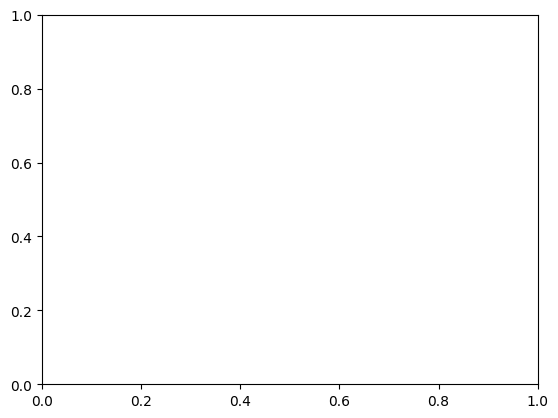

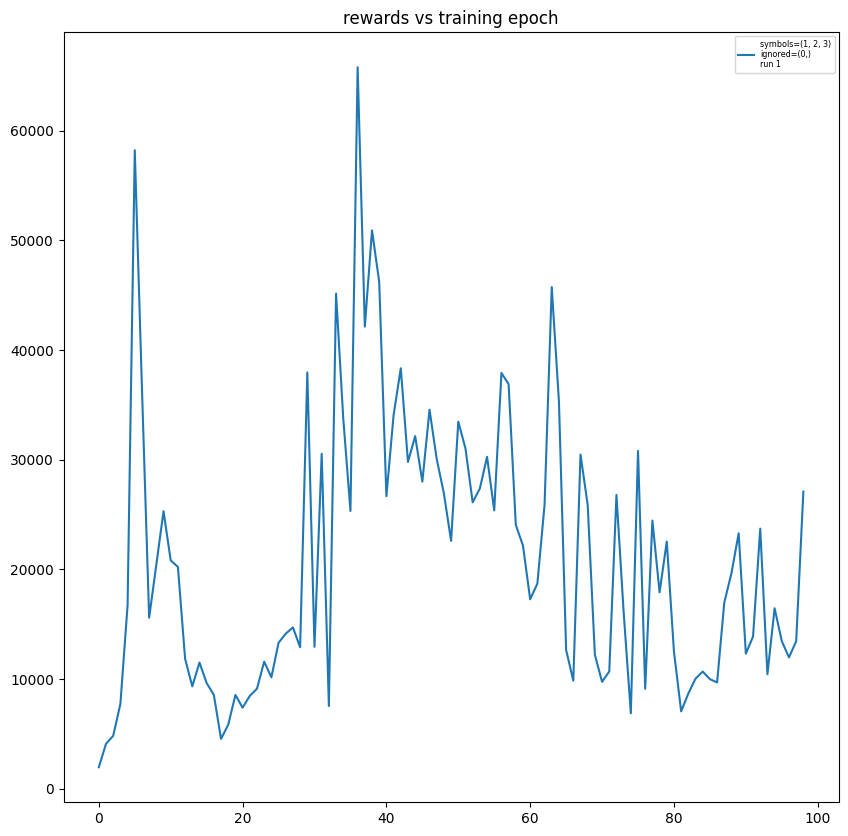

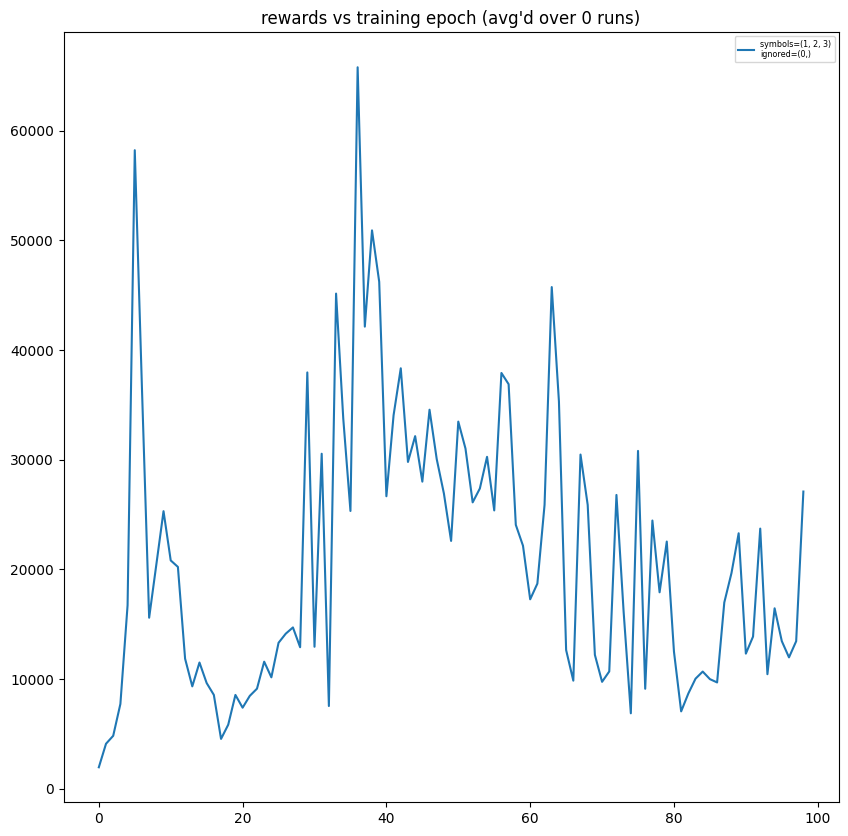

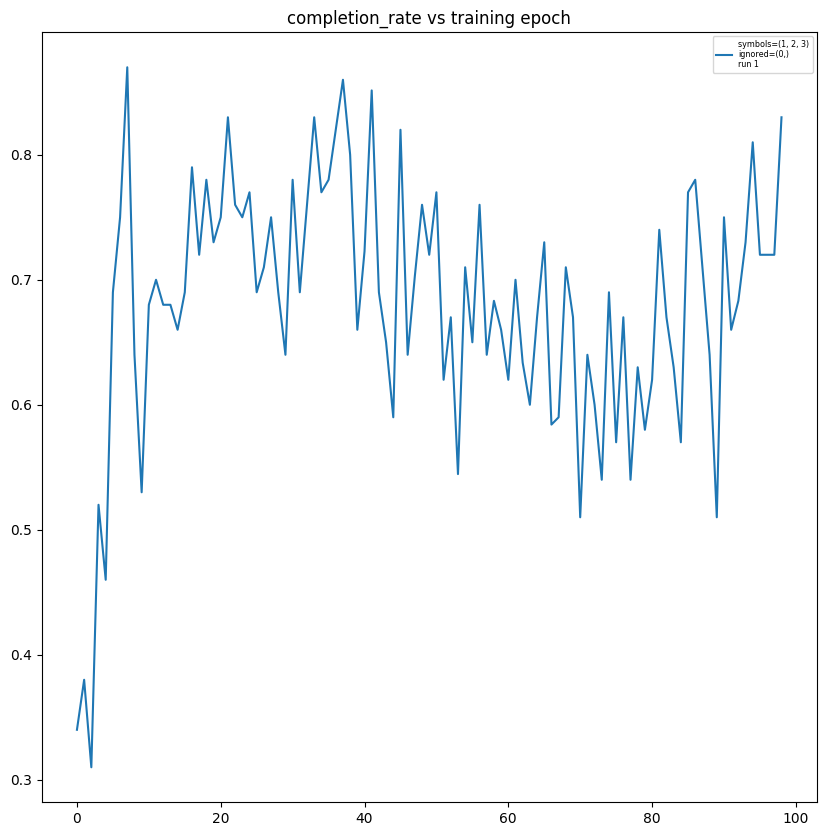

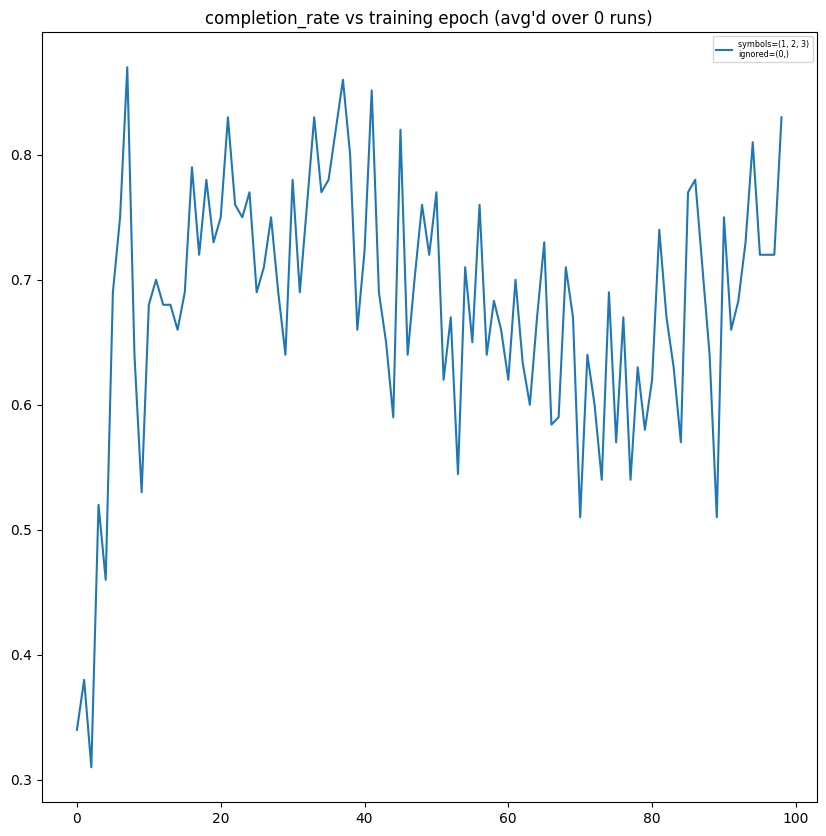

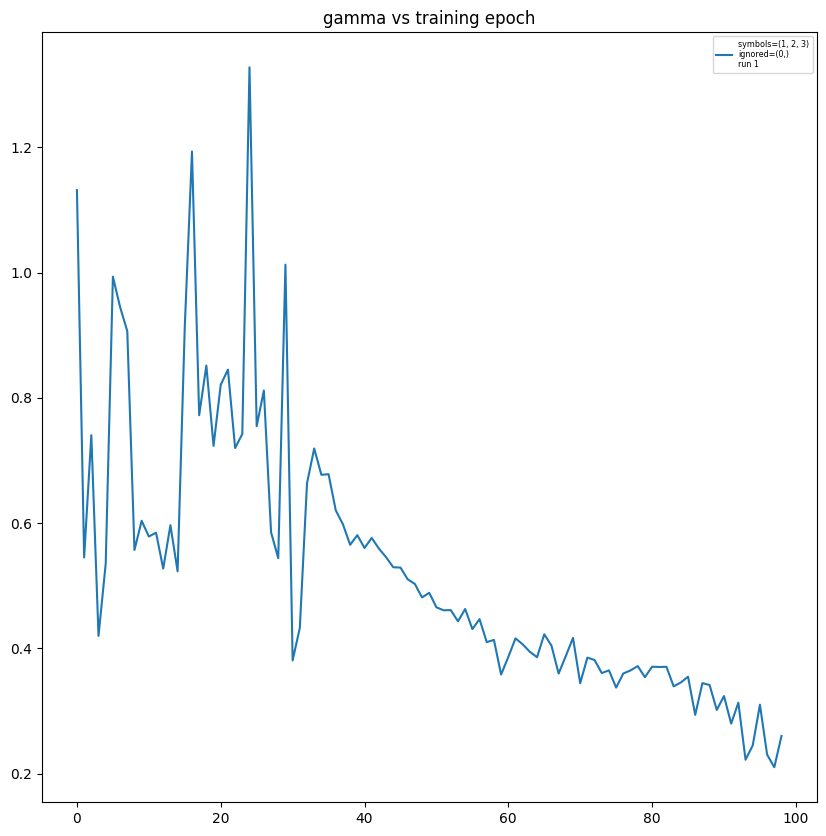

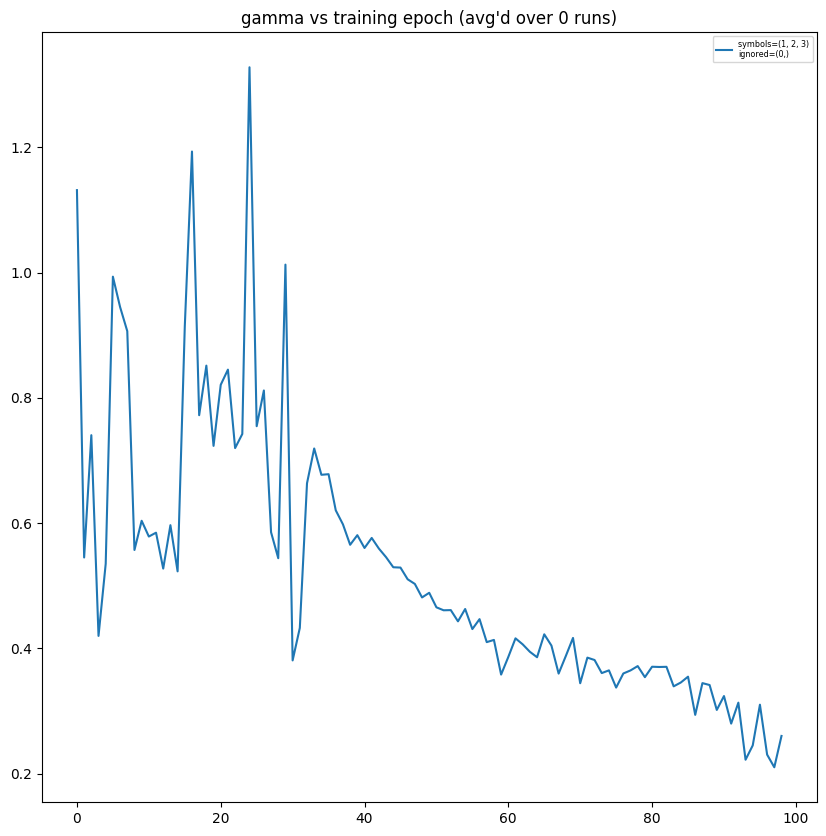

In [3]:
#######################
### Load Experiment ###
#######################

#name = "test_exp"
#name = "backwards-both_runs"
#name = 'both_runs'
#name = "small_pert"
#name = "extra_small_pert"
#name = "xxs_pert_exp"
#name = 'm-ablation'
#name = 'symbol-ablation-default_dataset'
#name = 'symbol-ablation-default_dataset_2'
name = 'nontrivial_2'
exp = load_experiment(name)
plot_experiment_new(exp)

In [5]:
config_idx = 2#2
run_idx = 0#1
best_model_idx = np.argmax(exp['completion_rate'][config_idx][1][run_idx])
#best_model_idx = np.argmin(exp['gamma'][config_idx][1][run_idx])
#best_model_idx = 79 #-2
#best_model_idx = 39
print(best_model_idx)
ae = exp['ae_list'][config_idx][1][run_idx][best_model_idx]
fdyn = exp['fdyn_list'][config_idx][1][run_idx][best_model_idx]
ae.encode(torch.tensor([0.,0.,0.,0.]))

7


tensor([-0.0012, -0.0020], device='cuda:0', grad_fn=<ViewBackward0>)

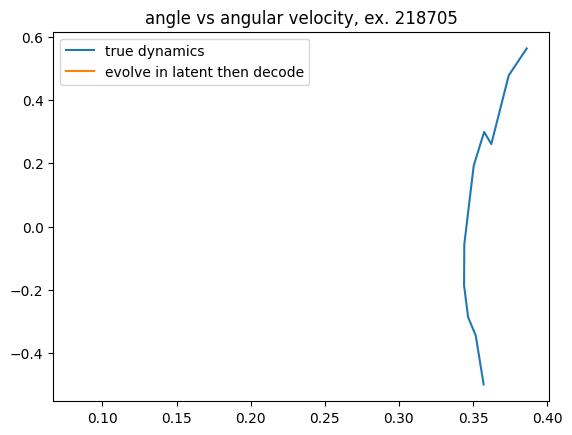

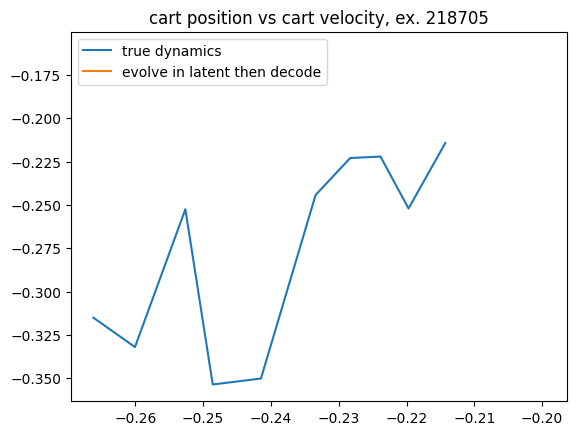

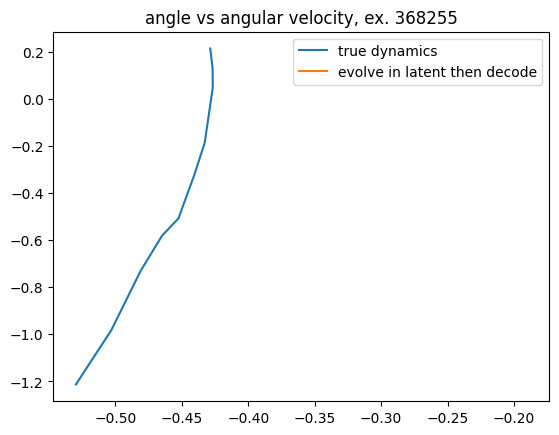

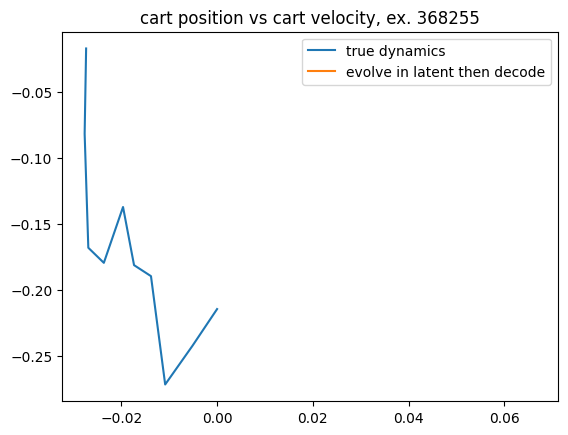

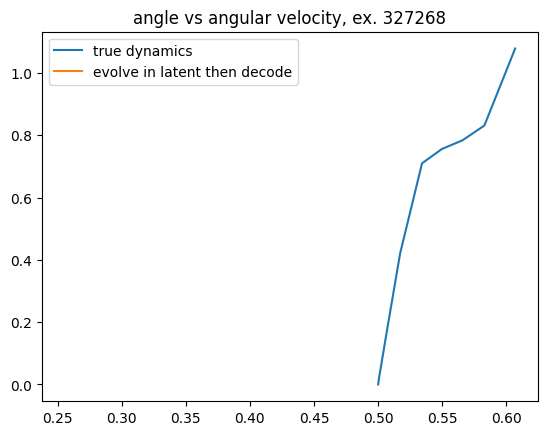

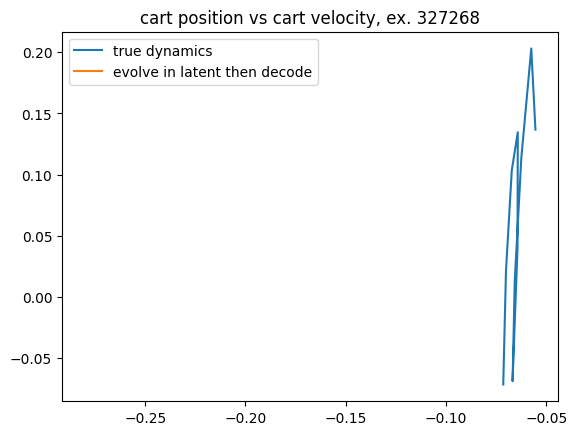

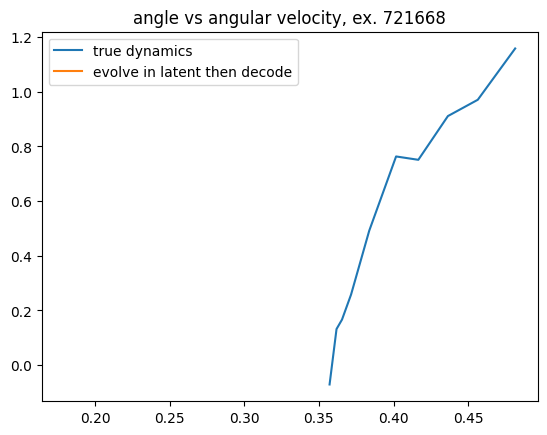

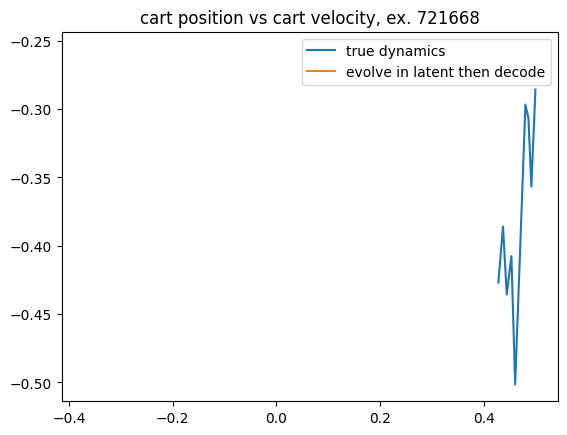

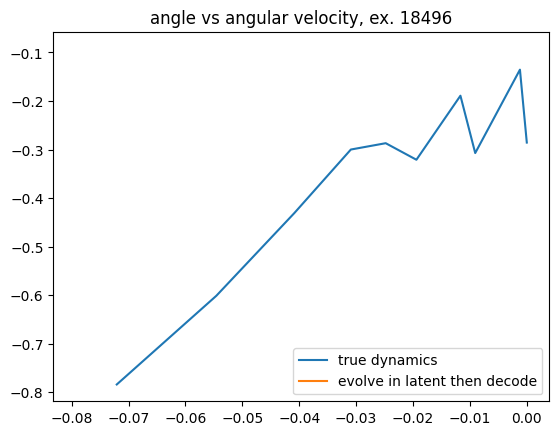

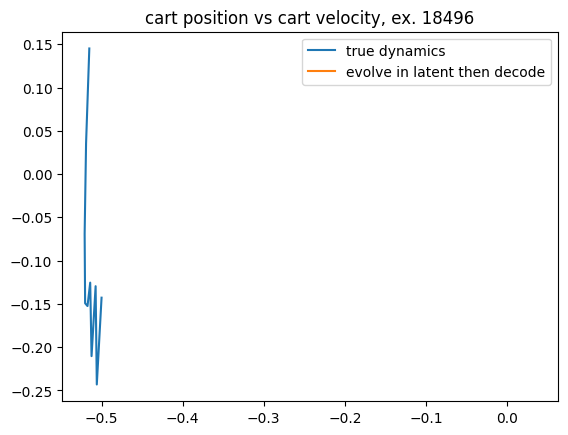

In [8]:
#########################
### Plot Trajectories ###
#########################

plot_trajectories(ae, fdyn, Xtest[0], Utest[0], 5, steps=params.traj_len)#params.m+1)

In [ ]:
######################
### Plot Stability ###
######################

from plotting import plot_stability
n_pts = 5000
eps = np.pi/6 #np.pi/3 
T = 500
tol = np.pi/2
low = [0+-eps, -eps, -eps, -eps]
high = [0+eps, eps, eps, eps]
plot_stability(ae, fdyn, n_pts, low, high, tol, T, visualize=False, latent_traj=True)

In [ ]:
##############################################
### Plot Inverse Image of Latent Norm Ball ###
##############################################

from plotting import plot_preimage_norm_ball

n = 10000
i = 1
j = 2
ivals = [0.]
jvals = [0.]
for ival in ivals:
    for jval in jvals:
        plot_preimage_norm_ball(ae, 0.25, i=i, ival=ival, j=j, jval=jval, n=n) #0.25

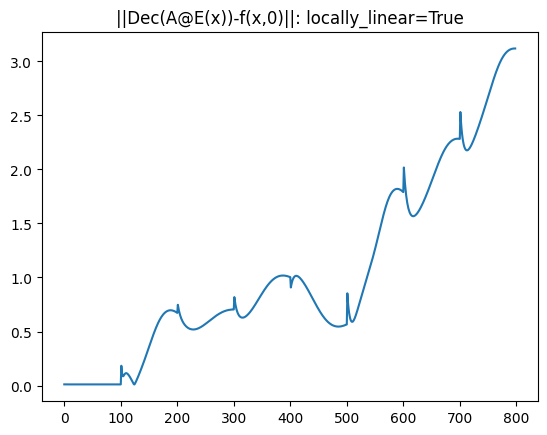

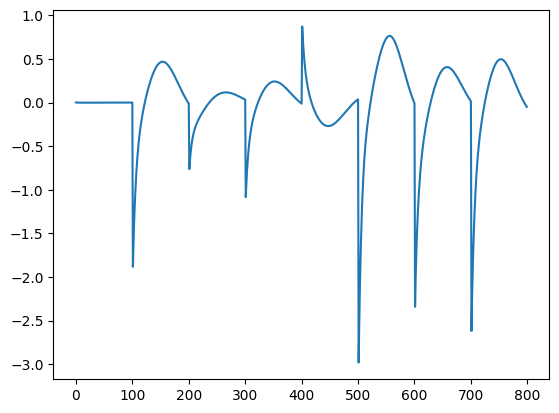

In [7]:
########################
### Stabilize System ###
########################

from controls import LQR

lqr = LQR(ae, fdyn)
stabilize_cartpole(lqr, ae, T=1, tmax=800, stabilize=True)

z_eq tensor([[-0.0012, -0.0020]], device='cuda:0', grad_fn=<AddmmBackward0>)


100%|██████████| 3000/3000 [05:38<00:00,  8.87it/s]


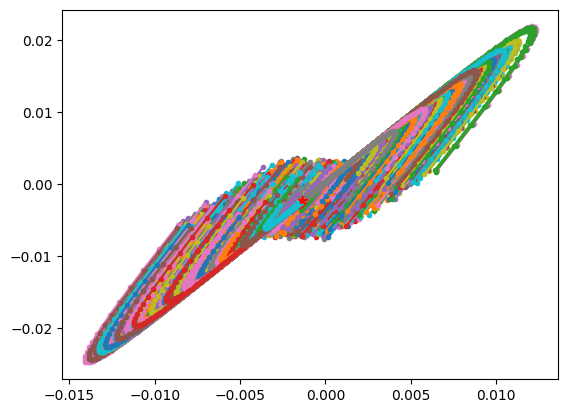

100%|██████████| 3000/3000 [05:10<00:00,  9.67it/s]


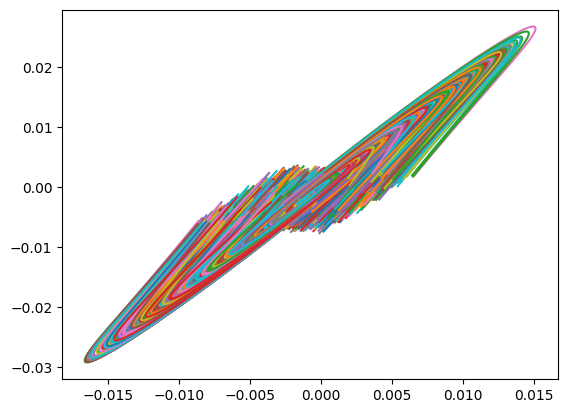

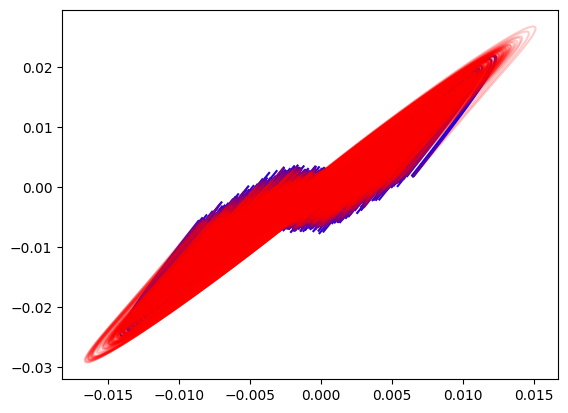

x data (3000, 301, 4)
z data (3000, 301, 2)
z proj data (3000, 301, 2)
u data (3000, 300, 1)
gamma forward 0.00022075366
gamma backward 0.06561207


In [17]:
####################################
### Initialize Data for Lyapunov ###
####################################

from plotting import plot_latent_trajectories
from utils import rollout_trajectories

r = 1.2e-1#2e-3 #1e-3
r_test = r #1e-3 #5e-3
rz_init = 0.01 #0.080 #0.005
#rx_init = rz_init
#rz_proj_init = 0.06
n_traj = 3000 #250 350 1000
T = 300
b = ae.encode(torch.tensor(4*[0.,])).cpu().detach().numpy()


for u_cost in [1]:
    lqr = LQR(ae, fdyn, u_cost=u_cost)
    pts, z_data, x_init_cond = plot_latent_trajectories(ae, fdyn, rz_init, n_traj, T=T, plot_quadratic=False, origin_spec=(b, r), lqr=lqr) #r=0.05
    x_data, z_proj_data, u_data, gammas = rollout_trajectories (ae, fdyn, lqr, x_init_cond, plot=True, n_traj=n_traj, T=T)
    gamma_fwd, gamma_bwd = gammas
    
    for zi in z_data:
        plt.plot(zi[:,0], zi[:,1], 'b-')
    for zi in z_proj_data:
        plt.plot(zi[:,0], zi[:,1], 'r-', alpha=0.2)
    plt.show()
    
    u_data = u_data[...,np.newaxis]
    
    #print(pts.shape)
    print("x data", x_data.shape)
    print("z data", z_data.shape)
    print("z proj data", z_proj_data.shape)
    print("u data", u_data.shape)
    print("gamma forward", gamma_fwd)
    print("gamma backward", gamma_bwd)

z_eq: tensor([-0.0012, -0.0020], device='cuda:0', grad_fn=<ViewBackward0>)
pd loss: False
dyn loss: True
lb loss False
grad loss False
rho: 0.9
c lb 0.1
l_dyn 1
l_pd 1
l_lb 1
l_grad 1e-06
using grid data, grid_density: 100
features: 128
coeff: 0.1
LyapunovGeneral(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=128, bias=False)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=128, bias=False)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=1, bias=False)
  )
)
it 0: tensor([3.2527e-07], device='cuda:0', grad_fn=<AddBackward0>)
it 1000: tensor([5.2954e-08], device='cuda:0', grad_fn=<AddBackward0>)
it 2000: tensor([3.4541e-08], device='cuda:0', grad_fn=<AddBackward0>)
it 3000: tensor([2.7598e-08], device='cuda:0', grad_fn=<AddBackward0>)
it 4000: tensor([2.3806e-08], device='cuda:0', grad_fn=<AddBackward0>)
alpha 0.018817638978362083
torch.Size([903000, 2])
Lipschitz constant tensor(7.4413, device='cuda:0', grad_fn=<MaxBackward1>)


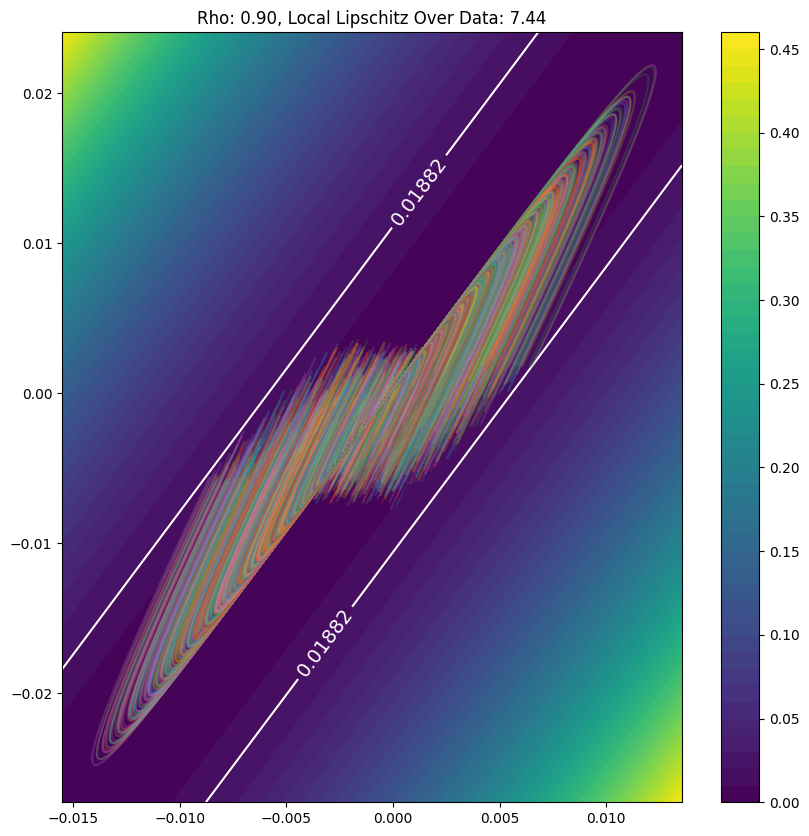

In [18]:
###############################
### Learn Lyapunov Function ###
###############################

from controls import mlp_lyapunov, mlp_lyapunov_reparam
from experiments import load_experiment

z_eq = ae.encode(torch.tensor([0.,0.,0.,0]).float())
#z_eq = torch.tensor([0.,0.]).float()
print("z_eq:", z_eq)
rho = 0.90
V, rho, alpha, lip = mlp_lyapunov_reparam(z_data, epochs=int(0.5e4), lr=2e-4, grid_dens=100, rho=rho, z_eq=z_eq) #ep 3e4

(1607, 4)
0.018165921792387962


100%|██████████| 1607/1607 [05:46<00:00,  4.64it/s]


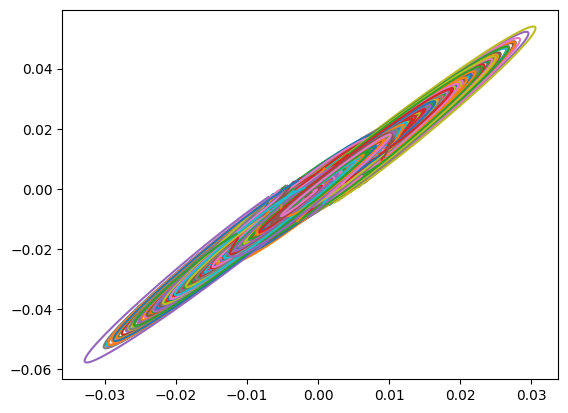

(1607, 201, 2)
gamma fwd: 0.00086417067
L: 7.6767191886901855
a0: 0.018165921792387962
Ly/p: 0.066339955


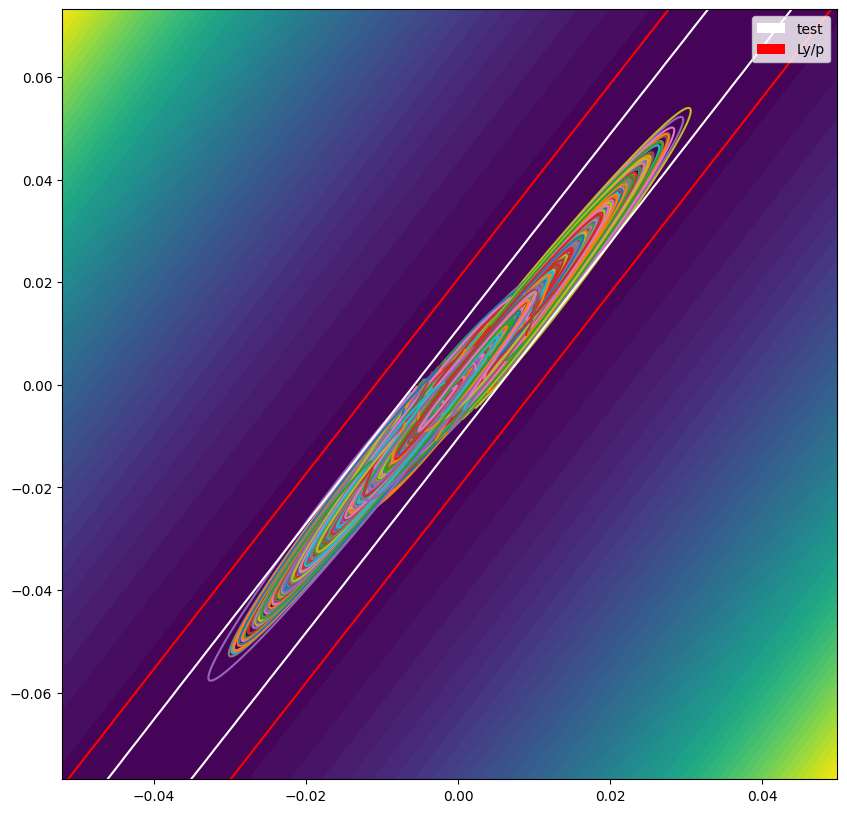

In [23]:
from theorem_tools import compute_preimage, plot_lyapunov_lvlsets

Dx = compute_preimage(ae, z_data, 0.05, 10, uniform_sampling=True)
print(Dx.shape)
a0 = torch.max(V(ae.encode(torch.tensor(Dx)))).cpu().item()
print(a0)
Dz = z_data
plot_lyapunov_lvlsets(V, ae, fdyn, Dx, Dz, a0)

3000


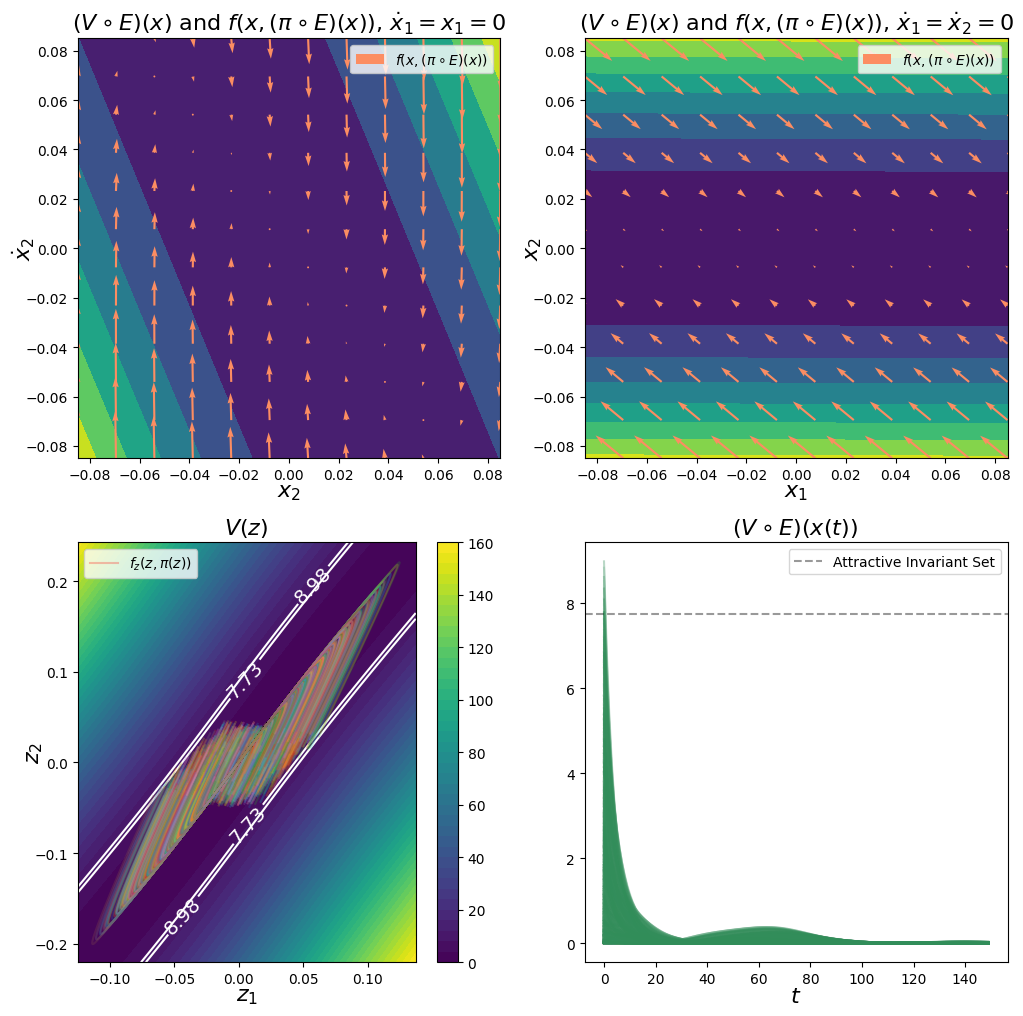

In [28]:
###################
### Make Figure ###
###################


from plotting import plot_lyapunov_slice

lqr = LQR(ae, fdyn)
#plot_lyapunov_slice(V, lqr, ae, (0.5, 0.05), (0.5, 0.05), z_data, z_proj_data)
plot_lyapunov_slice(V, lqr, ae, (rz_init, rz_init), (rz_init, rz_init), z_data, z_proj_data, 7.731, alpha)
#0.001974


In [ ]:
###############################################
### Video: Evolution of Latent Trajectories ###
###############################################


from videos import latent_projections_video
from controls import LQR
lqr = LQR(ae, fdyn)
latent_projections_video(lqr, ae, fdyn, 0.2, T=500, N=9)